In [1]:
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm


import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')

RSEED=42

sns.set_context('talk')
plt.style.use(['dark_background'])
#plt.rcParams['image.cmap'] = "orangered"
plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [2]:
data =  pd.read_csv("./data/data_prep_clf.csv", index_col=[0])

In [3]:
data_b=data.drop(["target",'trafic_airquality', '6fold_airquality'],axis=1)

In [45]:
data_b

,location,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,...,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,Bi_airquality
0,2,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,0.0,...,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,bad
1,3,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,0.0,...,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,bad
2,0,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,0.0,...,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,good
3,0,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,0.0,...,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,bad
4,0,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,0.0,...,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,0,27.841667,16.550000,20.573209,2.987662,8.926124,19.458333,11.291667,31.842,0.0,...,0.890000,2.194167,88.730000,87.890833,88.382934,0.187366,0.035106,88.393333,0.839167,bad
15535,4,29.550000,18.991667,23.546832,2.614979,6.838117,23.208333,10.558333,9.046,0.0,...,1.094167,2.330833,88.704167,88.082500,88.435840,0.141562,0.020040,88.450000,0.621667,good
15536,3,34.108333,16.950000,24.637083,4.352597,18.945097,24.179167,17.158333,3.893,0.0,...,0.897500,3.608333,90.885000,90.145833,90.522397,0.161257,0.026004,90.520000,0.739167,bad
15537,3,30.900000,15.891667,23.472934,4.651403,21.635547,23.066667,15.008333,0.017,0.0,...,0.828333,2.683333,90.793333,90.106667,90.486202,0.160746,0.025839,90.512500,0.686667,bad


In [4]:
y=data_b["Bi_airquality"]
X= data_b.drop(["Bi_airquality"], axis =1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  stratify=y ,random_state=RSEED)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rfc = RandomForestClassifier(n_estimators=100,
                                   random_state=RSEED,
                                   max_features = 'sqrt',
                                   n_jobs=-1, verbose = 1)


In [8]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=42,
                       verbose=1)

In [9]:
n_nodes = []
max_depths = []

for ind_tree in tqdm(rfc.estimators_):
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

100%|██████████| 100/100 [00:00<00:00, 222155.93it/s]

Average number of nodes 2452
Average maximum depth 28


## Randomforest results

In [10]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [22]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_train.ravel(), [1 for _ in range(len(y_train.ravel()))])
    baseline['precision'] = precision_score(y_train.ravel(), [1 for _ in range(len(y_train.ravel()))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_train.ravel(), predictions)
    results['precision'] = precision_score(y_train.ravel(), predictions)
    results['roc'] = roc_auc_score(y_train.ravel(), probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train.ravel(), train_predictions)
    train_results['precision'] = precision_score(y_train.ravel(), train_predictions)
    train_results['roc'] = roc_auc_score(y_train.ravel(), train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_train.ravel(), [1 for _ in range(len(y_train.ravel()))])
    model_fpr, model_tpr, _ = roc_curve(y_train.ravel(), probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [12]:
train_rf_predictions = rfc.predict(X_train)
train_rf_probs = rfc.predict_proba(X_train)[:, 1]

rf_predictions = rfc.predict(X_test)
rf_probs = rfc.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [13]:
from collections import Counter
print(Counter(train_rf_probs))
print(Counter(rf_predictions))

Counter({0.0: 3000, 0.01: 1159, 0.02: 562, 0.03: 388, 0.04: 315, 1.0: 230, 0.05: 220, 0.99: 215, 0.98: 175, 0.06: 168, 0.07: 167, 0.97: 167, 0.08: 144, 0.96: 136, 0.95: 130, 0.09: 127, 0.93: 116, 0.94: 113, 0.11: 112, 0.1: 105, 0.13: 96, 0.91: 94, 0.12: 93, 0.9: 92, 0.92: 91, 0.89: 84, 0.14: 83, 0.15: 82, 0.87: 80, 0.86: 80, 0.18: 73, 0.79: 73, 0.16: 69, 0.85: 68, 0.81: 68, 0.88: 67, 0.17: 64, 0.82: 64, 0.21: 63, 0.83: 63, 0.22: 57, 0.78: 56, 0.77: 56, 0.2: 56, 0.8: 55, 0.84: 52, 0.75: 52, 0.19: 51, 0.76: 50, 0.23: 44, 0.71: 40, 0.74: 39, 0.73: 39, 0.25: 38, 0.28: 36, 0.72: 35, 0.7: 34, 0.26: 32, 0.24: 31, 0.15143321554125808: 31, 0.27: 30, 0.3: 30, 0.68: 29, 0.67: 29, 0.29: 28, 0.65: 27, 0.69: 27, 0.66: 23, 0.63: 23, 0.33: 20, 0.64: 20, 0.31: 19, 0.26266683043279476: 19, 0.3182290275159099: 18, 0.1090912815675857: 18, 0.32: 17, 0.18445504088250073: 16, 0.34: 14, 0.06895993016084882: 13, 0.61: 12, 0.9101684834492915: 12, 0.6: 12, 0.36: 11, 0.35: 11, 0.10051771839271838: 10, 0.62: 10, 0

In [23]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['bad' 'good'] and y_pred=[1]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[3077  287]
 [ 417  881]]


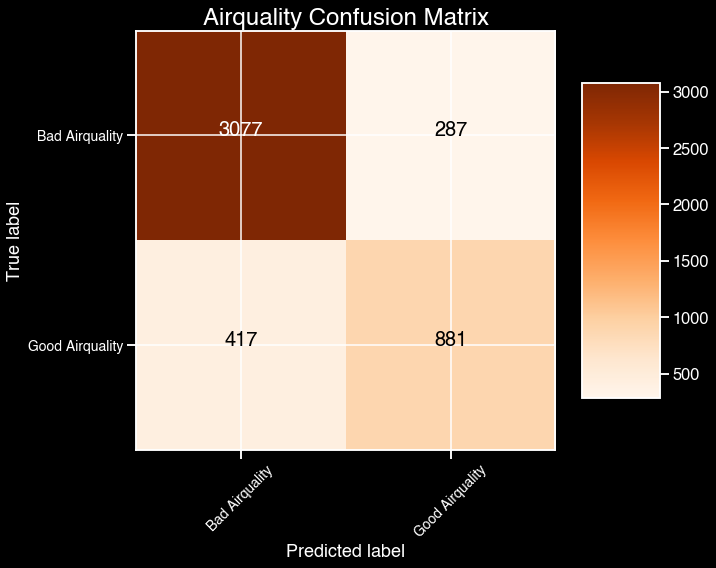

In [25]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Bad Airquality', 'Good Airquality'],
                      title = 'Airquality Confusion Matrix')

## RF optimization

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 5, 
                        n_iter = 10, verbose = 5, random_state=RSEED)

# Fit 
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.814 total time=   8.6s
[CV 1/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.833 total time=   8.6s
[CV 3/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.820 total time=   8.8s
[CV 4/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.830 total time=   8.9s
[CV 5/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.836 total time=   8.9s
[CV 4/5] END bootstrap=False, max_depth=17, max_features=0.5, max_leaf_nodes=18, min_samples_split=10, n_estimators=149;, score=0.801 total time=  18.6s
[CV 1/5] END bootstrap=Fal

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                     

In [67]:
rs.best_params_

{'n_estimators': 196,
 'min_samples_split': 10,
 'max_leaf_nodes': 49,
 'max_features': 0.7,
 'max_depth': 17,
 'bootstrap': True}

In [68]:
best_model = rs.best_estimator_

In [69]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [71]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 97
Average maximum depth 11


In [28]:
rfc_opt=RandomForestClassifier(n_estimators=196,
                                   random_state=RSEED,
                                    min_samples_split= 10,
                                    max_leaf_nodes = 49,
                                    max_features = 0.7,
                                   max_depth = 17,
                                   bootstrap = True,
                                   n_jobs=-1, verbose = 1)

rfc_opt.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    6.6s finished


RandomForestClassifier(max_depth=17, max_features=0.7, max_leaf_nodes=49,
                       min_samples_split=10, n_estimators=196, n_jobs=-1,
                       random_state=42, verbose=1)

In [29]:
train_rf_predictions_opt = rfc_opt.predict(X_train)
train_rf_probs_opt = rfc_opt.predict_proba(X_train)[:, 1]

rf_predictions_opt = rfc_opt.predict(X_test)
rf_probs_opt = rfc_opt.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 196 out of 196 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 196 out of 196 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 196 out of 196 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 196 out of 196 | elapsed:    0.1s finished


In [30]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['bad' 'good'] and y_pred=[1]. Make sure that the predictions provided by the classifier coincides with the true labels.

Confusion matrix, without normalization
[[3077  287]
 [ 417  881]]


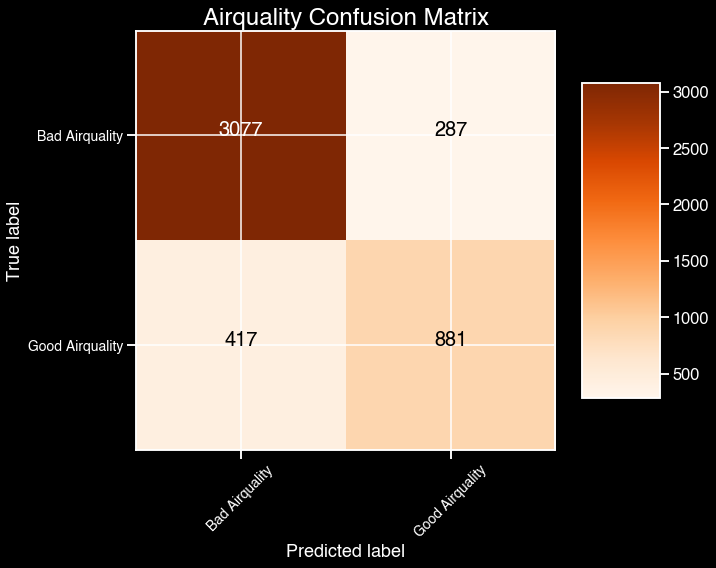

In [31]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Bad Airquality', 'Good Airquality'],
                      title = 'Airquality Confusion Matrix')

In [73]:
fig = plt.figure(figsize=(25,20))
dectree_plot = plot_tree(best_model.estimators_[0], filled=True)

NameError: name 'plot_tree' is not defined

<Figure size 1800x1440 with 0 Axes>

## Featureimportance 

In [87]:
features = list(X_train.columns)

In [88]:
fi = pd.DataFrame({'feature': features,
                        'importance': rfc_opt.feature_importances_}).sort_values('importance', ascending = False)

fi.head(10)

,feature,importance
34,median_wind_spd,0.174684
31,mean_wind_spd,0.065757
0,location,0.047628
26,var_wind_dir,0.042449
2,min_temp,0.040791
25,std_wind_dir,0.037409
38,mean_atmos_press,0.034786
24,mean_wind_dir,0.031796
41,median_atmos_press,0.030850
20,median_rel_humidity,0.029357


## Tri

In [32]:
data_t = data.drop(["target",'Bi_airquality', '6fold_airquality'],axis=1)

In [33]:
data_t

,location,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,...,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,trafic_airquality
0,2,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,0.0,...,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,yellow
1,3,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,0.0,...,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,yellow
2,0,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,0.0,...,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,green
3,0,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,0.0,...,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,yellow
4,0,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,0.0,...,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,0,27.841667,16.550000,20.573209,2.987662,8.926124,19.458333,11.291667,31.842,0.0,...,0.890000,2.194167,88.730000,87.890833,88.382934,0.187366,0.035106,88.393333,0.839167,yellow
15535,4,29.550000,18.991667,23.546832,2.614979,6.838117,23.208333,10.558333,9.046,0.0,...,1.094167,2.330833,88.704167,88.082500,88.435840,0.141562,0.020040,88.450000,0.621667,green
15536,3,34.108333,16.950000,24.637083,4.352597,18.945097,24.179167,17.158333,3.893,0.0,...,0.897500,3.608333,90.885000,90.145833,90.522397,0.161257,0.026004,90.520000,0.739167,yellow
15537,3,30.900000,15.891667,23.472934,4.651403,21.635547,23.066667,15.008333,0.017,0.0,...,0.828333,2.683333,90.793333,90.106667,90.486202,0.160746,0.025839,90.512500,0.686667,yellow


In [34]:
y=data_t["trafic_airquality"]
X= data_t.drop(["trafic_airquality"], axis =1)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  stratify=y ,random_state=RSEED)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator_tri = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator_tri, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 5, 
                        n_iter = 10, verbose = 5, random_state=RSEED)

# Fit 
rs.fit(X_train, y_train)

In [ ]:
rs.best_params_

In [ ]:
best_model = rs.best_estimator_

In [ ]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

In [ ]:
rfc_opt_tri=RandomForestClassifier(n_estimators=196,
                                   random_state=RSEED,
                                    min_samples_split= 10,
                                    max_leaf_nodes = 49,
                                    max_features = 0.7,
                                   max_depth = 17,
                                   bootstrap = True,
                                   n_jobs=-1, verbose = 1)

rfc_opt_tri.fit(X_train,y_train)

In [ ]:
train_rf_predictions_opt_tir = rfc_opt_tri.predict(X_train)
train_rf_probs_opt_tri = rfc_opt_tri.predict_proba(X_train)[:, 1]

rf_predictions_opt_tri = rfc_opt_tri.predict(X_test)
rf_probs_opt_tri = rfc_opt_tri.predict_proba(X_test)[:, 1]

In [ ]:
cm = confusion_matrix(y_test, rf_predictions_opt_tri)
plot_confusion_matrix(cm, classes = ['Bad Airquality', "Medium",'Good Airquality'],
                      title = 'Airquality Confusion Matrix')

In [ ]:
fi = pd.DataFrame({'feature': features,
                        'importance': rfc_opt_tri.feature_importances_}).sort_values('importance', ascending = False)

fi.head(10)